Fake News = 1    
True News = 0

Le fichier "News.csv" contient les articles pret a entrainer par le modele

In [1]:
from google.colab import files
import pandas as pd



News = pd.read_csv("News.csv")


News.shape


(12520, 2)

Cette fonction permet de netoyer le text pour les vrais news

In [ ]:
import re

def clean_textTrueNews(text):
  if not isinstance(text, str):
      return ""
  text = re.sub(r'<[^>]+>', '', text)
  text = re.sub(r'\s+', ' ', text)
  text = re.sub(r'http\S+', '', text)
  text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
  text = re.sub(r'@\w+', '', text)
  text = re.sub(r'#\w+', '', text)
  text = text.lower()
  return text.strip()



(3303, 2)

Cette fonction permet de netoyer le text pour les faux news

In [ ]:
import pandas as pd
import re


def clean_textFakeNews(text):
    if not isinstance(text, str):
        return ""

    text = re.sub(r"\[\"|\"\]", "", text)
    # Étape 1 : Extraction des textes entre guillemets
    quotes = re.findall(r'"(.*?)"|“(.*?)”', text)
    if quotes:
        extracted_texts = [''.join(q) for q in quotes]
        text = ' '.join(extracted_texts).strip()
    else:
        return ""

    # Étape 2 : Suppressions progressives
    text = re.sub(r'<[^>]+>', '', text)  # Supprimer balises HTML
    text = re.sub(r'http\S+', '', text)  # Supprimer URLs
    text = re.sub(r'@\w+', '', text)     # Supprimer mentions
    text = re.sub(r'#\w+', '', text)     # Supprimer hashtags
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Conserver lettres, chiffres et espaces
    text = re.sub(r'\s+', ' ', text)  # Réduire espaces multiples
    text = text.lower()  # Tout en minuscule

    return text.strip()



,titre,contenu
0,Video shows ~ Fi\nPakistan police da\nheating ...,khan is a member of pakistan tehreekeinsaf pti...
1,Ukrainian\nprosecutor's = | =\nSOniN 5 Sear\nM...,the son of a ukrainian prosecutor together wit...
2,Video shows -\nIndonesian B\nparty chairman q\...,the moment ahy descended from the sky indonesi...
3,First president to | x\nvisit restive Qo) a)\n...,pbbm is supposedly a weak leader but hes the f...
4,| a\n\nVideo shows Taylor\n\nSwift and Travis\...,taylor swift and travis kelce fall off a porch...
5,Asif Aziz pledged ei aS o\nto fund India ody a...,drawn global attention indian prime minister n...
6,"Pr Astana 3 y, . \\nImages ofa 2.) 7/1 3\na ai...",a group of geologists found the skeletons of g...
7,South Korean =\npolitician | Pewee\npicketed a...,and yet they still vote for her the photo show...
8,Video shows aa\naftermath of iy sa ©\nIndonesi...,earthquake in bawean gresik after the friday p...
9,ian am h 2 i\nseat na =\n,what kind of drama is this the injury is in th...


Nettoyer le Titre

In [ ]:
def clean_titleFakeNews(text):
  custom_words = set(["false", "misleading", "altered"])
  if not isinstance(text, str):  # Vérifie si la valeur est une chaîne
    return ""
  text = re.sub(r'[^a-zA-Z\s]', '', text)
  text = re.sub(r'\s+', ' ', text).strip()
  text = text.lower()
  text = ' '.join([word for word in text.split() if len(word) > 3])
  text = ' '.join([word for word in text.split() if word.lower() not in custom_words])

  lettres_repete = r'\b\w*([a-zA-Z])\1{2,}\w*\b'
  text = re.sub(lettres_repete, '', text)
  text = re.sub(r'\s+', ' ', text).strip()

  return text


,titre,contenu
0,video shows pakistan police heating women lini...,khan is a member of pakistan tehreekeinsaf pti...
1,ukrainian prosecutors sonin sear monaco,the son of a ukrainian prosecutor together wit...
2,video shows indonesian party chairman skydiving,the moment ahy descended from the sky indonesi...
3,first president visit restive province inthe p...,pbbm is supposedly a weak leader but hes the f...
4,video shows taylor swift travis kelce falling ...,taylor swift and travis kelce fall off a porch...
5,asif aziz pledged fund india mosque interview,drawn global attention indian prime minister n...
6,astana images ralls giants skeleton foundinsri...,a group of geologists found the skeletons of g...
7,south korean politician pewee picketed ahead i...,and yet they still vote for her the photo show...
8,video shows aftermath indonesia quake,earthquake in bawean gresik after the friday p...
9,seat,what kind of drama is this the injury is in th...


Pour combiner les deux datasets

In [ ]:


fakeS['label'] = 1
TNews = pd.DataFrame()
TNews['text'] = trueS['titre'].str.cat(trueS['contenu'], sep=' ', na_rep='')
TNews['label'] = 0
selectColumns = fakeS[['contenu', 'label']]
selectColumns = selectColumns.rename(columns={'contenu': 'text'})
News = pd.concat([TNews, selectColumns], ignore_index=True)
News = News[News['text'].str.len() > 50]
fakeS = fakeS.dropna(subset=['contenu'])


(9222, 2)

supprimer les mots vides

In [ ]:


from nltk.corpus import stopwords

import nltk
# nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

News['text'] = News['text'].apply(
    lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words])
)
News = News.reset_index(drop=True)

News.tail()



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,text,label
9217,israel west bank palestine disappeared google ...,1
9218,brainless stupid tiktoker muslim girl arabian ...,1
9219,crows allowing customers come super market saudi,1
9220,act praying might loyalty religion mutiny india,1
9221,90s us threatened iraq spreading coronavirus m...,1


In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 67.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


La tokenisation et la lemmatisation

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

def lemmatize_text(text):
    # Traitez le texte avec spaCy, cela effectue la tokenisation et la lemmatisation
    doc = nlp(text)
    # Retourne la chaîne lemmatisée en un seul passage
    return " ".join([token.lemma_ for token in doc])


print(News['label'].value_counts())
# News.shape

label
1    6996
0    5524
Name: count, dtype: int64


Afficher la distribution des classes

<ipython-input-133-34725b1f160a>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=News, palette='Set2')


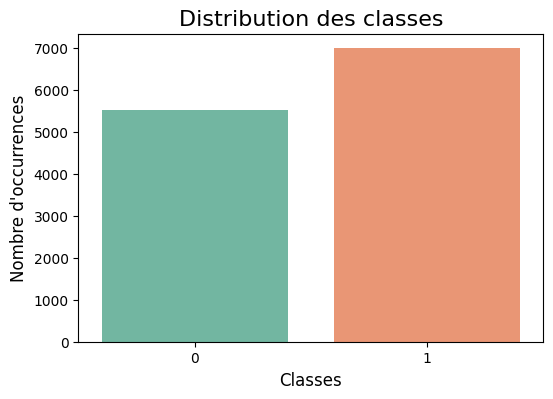

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=News, palette='Set2')
plt.title('Distribution des classes', fontsize=16)
plt.xlabel('Classes', fontsize=12)
plt.ylabel('Nombre d\'occurrences', fontsize=12)
plt.xticks(rotation=0)
plt.show()




Diviser les donnees  ( 80% train et 20% test )

In [2]:
from sklearn.model_selection import train_test_split

X = News['text']
y = News['label']


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

Text vectorization ( TF-IDF )

In [3]:

from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()


xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)



La regression Logistique

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

params = {
    'C': [0.01, 0.1, 1],
    'penalty': ['l2', 'l1'],
    'solver': ['liblinear', 'saga']
}

model = LogisticRegression(max_iter = 1000)
grid = GridSearchCV(model, param_grid=params, scoring='f1', cv=5)
grid.fit(xv_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2', 'l1'],
                         'solver': ['liblinear', 'saga']},
             scoring='f1')

In [ ]:
print("best :", grid.best_params_)

best : {'C': 1, 'penalty': 'l2', 'solver': 'saga'}


In [ ]:
# from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=1, penalty='l2', solver='saga', max_iter=1000)

LR.fit(xv_train, y_train)

LogisticRegression(C=1, max_iter=1000, solver='saga')

In [ ]:
pred_lr = LR.predict(xv_test)
pred_lr_train = LR.predict(xv_train)

In [ ]:
print(LR.score(xv_test, y_test))
print(LR.score(xv_train, y_train))

0.9233226837060703
0.9690495207667732


Classification report

In [ ]:
from sklearn.metrics import classification_report


print(classification_report(y_test, pred_lr))
print(classification_report(y_train, pred_lr_train))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91      1127
           1       0.91      0.95      0.93      1377

    accuracy                           0.92      2504
   macro avg       0.93      0.92      0.92      2504
weighted avg       0.92      0.92      0.92      2504

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      4397
           1       0.96      0.98      0.97      5619

    accuracy                           0.97     10016
   macro avg       0.97      0.97      0.97     10016
weighted avg       0.97      0.97      0.97     10016



Matrice de confusion

In [ ]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, pred_lr))

[[1001  126]
 [  66 1311]]


La classification bayesienne

In [ ]:
from sklearn.naive_bayes import MultinomialNB

param_grid = {'alpha': [0.01, 0.5, 1, 2.0, 5.0]}
grid_search = GridSearchCV(MultinomialNB(), param_grid, scoring='f1', cv=10)
grid_search.fit(xv_train, y_train)


GridSearchCV(cv=10, estimator=MultinomialNB(),
             param_grid={'alpha': [0.01, 0.5, 1, 2.0, 5.0]}, scoring='f1')

In [ ]:
print("best alpha: ", grid_search.best_params_)

best alpha:  {'alpha': 0.5}


Entrainer le modele

In [ ]:
NB = MultinomialNB(alpha=0.5)
NB.fit(x_train, y_train)

MultinomialNB(alpha=0.5)

In [ ]:
NB_predictionTest = NB.predict(xv_test)
NB_predictionTrain = NB.predict(xv_train)

In [ ]:
print(NB.score(xv_test, y_test))
print(NB.score(xv_train, y_train))

0.922923322683706
0.9791333865814696


L'arbre de decision

In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

params_grid = {'max_depth': range(150, 200),
               'min_samples_split': [200, 300],
               'min_samples_leaf': [5],
               'max_leaf_nodes': [200, 300],
               'min_impurity_decrease': [0.0001, 0.001, 0.01]
               }

random_search = RandomizedSearchCV(DecisionTreeClassifier(random_state=4), params_grid, n_iter=100, scoring='f1', cv=10, n_jobs=-1)
random_search.fit(xv_train, y_train)


KeyboardInterrupt: 

In [ ]:
print("best params: ", random_search.best_params_)

NameError: name 'random_search' is not defined

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(max_depth=172, min_samples_split=200, min_samples_leaf=5, max_leaf_nodes=200, min_impurity_decrease=0.001, random_state=4)
DT.fit(xv_train, y_train)

DecisionTreeClassifier(max_depth=172, max_leaf_nodes=200,
                       min_impurity_decrease=0.001, min_samples_leaf=5,
                       min_samples_split=200, random_state=4)

In [ ]:
pred_dt = DT.predict(xv_test)

In [7]:
print(DT.score(xv_test, y_test))
print(DT.score(xv_train, y_train))

NameError: name 'DT' is not defined

In [ ]:
News.to_csv('News.csv', index=False)
files.download('News.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>